<a href="https://colab.research.google.com/github/Ryan-spec/Portfolio-Projects/blob/master/Copy_of_Diabetes_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Diabetes Detection Using Machine Learning**

---



#### The Pima people have been instrumental in giving us great insight into Diabetes by their willingness to participate in research. Their involvement has led to significant findings with reguard to the epidemeology, physiology, clinical assessement and genetics of both type2 diabetes and obesity. 

###This information comes the national center for biotechnology information.

In [ ]:
# We will attempt to detect whether a person has diabetes or not

In [ ]:
# Load the libraries
from keras.models import Sequential
from keras.layers import Dense
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
# Load the data
from google.colab import files
uploaded = files.upload()

Saving datasets_228_482_diabetes.csv to datasets_228_482_diabetes.csv


In [ ]:
# Store the data into a dataframe
df = pd.read_csv('datasets_228_482_diabetes.csv')

# Get the first five rows of data
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
# Get the shape of the data i.e rows and columns
df.shape

(768, 9)

In [ ]:
# Check for duplicates and remove them 
df.drop_duplicates(inplace=True)

In [ ]:
# Get the new shape
df.shape

(768, 9)

In [ ]:
# Get the number of missing data
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
# Convert the data into an array
dataset = df.values
dataset

array([[  6.   , 148.   ,  72.   , ...,   0.627,  50.   ,   1.   ],
       [  1.   ,  85.   ,  66.   , ...,   0.351,  31.   ,   0.   ],
       [  8.   , 183.   ,  64.   , ...,   0.672,  32.   ,   1.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,   0.245,  30.   ,   0.   ],
       [  1.   , 126.   ,  60.   , ...,   0.349,  47.   ,   1.   ],
       [  1.   ,  93.   ,  70.   , ...,   0.315,  23.   ,   0.   ]])

In [ ]:
# Get all of the rows from the first eight columns of the dataset
X = dataset[:, 0:8] 
y = dataset[:, 8]



In [ ]:
# Process the data
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)
X_scale

array([[0.35294118, 0.74371859, 0.59016393, ..., 0.50074516, 0.23441503,
        0.48333333],
       [0.05882353, 0.42713568, 0.54098361, ..., 0.39642325, 0.11656704,
        0.16666667],
       [0.47058824, 0.91959799, 0.52459016, ..., 0.34724292, 0.25362938,
        0.18333333],
       ...,
       [0.29411765, 0.6080402 , 0.59016393, ..., 0.390462  , 0.07130658,
        0.15      ],
       [0.05882353, 0.63316583, 0.49180328, ..., 0.4485842 , 0.11571307,
        0.43333333],
       [0.05882353, 0.46733668, 0.57377049, ..., 0.45305514, 0.10119556,
        0.03333333]])

In [ ]:
# Split the data inot 80% and 20% testing 
X_train, X_test, y_train, y_test = train_test_split(X_scale, y, test_size=0.2, random_state=4)

In [ ]:
# Build our model 
model = Sequential([
    Dense(12, activation='relu', input_shape =(8,)),
    Dense(15, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [ ]:
# Compile the model
model.compile(
    optimizer='sgd',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [ ]:
# Train the model 
hist = model.fit(X_train, y_train, batch_size=42, epochs=1000, validation_split=0.2 )

Epoch 1/1000
12/12 [==============================] - 0s 15ms/step - loss: 0.6719 - accuracy: 0.6477 - val_loss: 0.6709 - val_accuracy: 0.6504
Epoch 2/1000
12/12 [==============================] - 0s 3ms/step - loss: 0.6682 - accuracy: 0.6477 - val_loss: 0.6674 - val_accuracy: 0.6504
Epoch 3/1000
12/12 [==============================] - 0s 3ms/step - loss: 0.6652 - accuracy: 0.6477 - val_loss: 0.6646 - val_accuracy: 0.6504
Epoch 4/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.6628 - accuracy: 0.6477 - val_loss: 0.6623 - val_accuracy: 0.6504
Epoch 5/1000
12/12 [==============================] - 0s 3ms/step - loss: 0.6608 - accuracy: 0.6477 - val_loss: 0.6604 - val_accuracy: 0.6504
Epoch 6/1000
12/12 [==============================] - 0s 3ms/step - loss: 0.6592 - accuracy: 0.6477 - val_loss: 0.6591 - val_accuracy: 0.6504
Epoch 7/1000
12/12 [==============================] - 0s 3ms/step - loss: 0.6580 - accuracy: 0.6477 - val_loss: 0.6578 - val_accuracy: 0.6504
Epoch

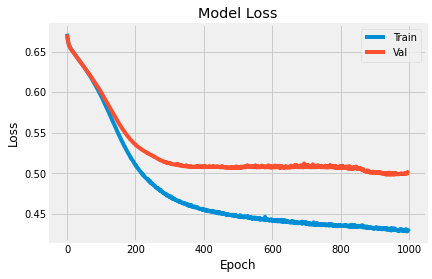

In [ ]:
# Visualize the training loss and the validation loss to see if the model has overfit
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc = 'upper right')
plt.show()

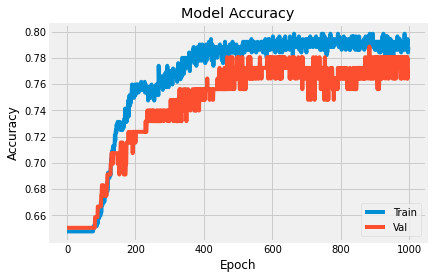

In [ ]:
# Visualize the training accuracy and the validation accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc = 'lower right')
plt.show()

In [ ]:
# Make a prediction and print the actual values
prediction = model.predict(X_test)
prediction = [1 if y>=0.5 else 0 for y in prediction] 
print(prediction)
print(y_test)

[0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1]
[0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 1. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 1.
 1. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 1.
 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1.
 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 1. 1. 0. 0. 0. 1. 1. 1. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 1. 1. 1. 0. 0. 0. 0. 0. 1. 1.]


In [ ]:
# Evaluate the model on the training data 
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
pred = model.predict(X_train)
pred = [1 if y>=0.5 else 0 for y in pred]
print(classification_report(y_train, pred))
print('Confusion Matrix: \n', confusion_matrix(y_train, pred))
print()
print('Accuracy: ', accuracy_score(y_train, pred))

              precision    recall  f1-score   support

         0.0       0.81      0.88      0.85       398
         1.0       0.75      0.62      0.68       216

    accuracy                           0.79       614
   macro avg       0.78      0.75      0.76       614
weighted avg       0.79      0.79      0.79       614

Confusion Matrix: 
 [[352  46]
 [ 81 135]]

Accuracy:  0.7931596091205212


In [ ]:
# Evaluate the model on the testing data 
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
pred = model.predict(X_test)
pred = [1 if y>=0.5 else 0 for y in pred]
print(classification_report(y_test, pred))
print('Confusion Matrix: \n', confusion_matrix(y_test, pred))
print()
print('Accuracy: ', accuracy_score(y_test, pred))


              precision    recall  f1-score   support

         0.0       0.82      0.82      0.82       102
         1.0       0.65      0.65      0.65        52

    accuracy                           0.77       154
   macro avg       0.74      0.74      0.74       154
weighted avg       0.77      0.77      0.77       154

Confusion Matrix: 
 [[84 18]
 [18 34]]

Accuracy:  0.7662337662337663


### The model performed decent; however, further manipulation of the data could result in higher accuracy, which is always best to strive for, especially when dealing with human life and the medical field in general.